# COVID-19 Cases Data Vizualisation Notebook
------------------

In [1]:
#conda install -c plotly plotly-orca

### Importing Libraries

In [2]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import seaborn as sns
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [3]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407


In [5]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37879,37920,38032,38099,38141,38200,38250,38252,38336,38475
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,22180,22527,23072,23609,24136,24520,24820,24820,25876,26381
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,57648,58146,58146,59135,59590,60028,60457,60888,61307,61700
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6293,6367,6452,6505,6598,6629,6629,6706,6706,6819
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8353,8470,8579,8679,8798,8841,8898,8924,8990,9194


In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1900,1906,1919,1935,1945,1956,1965,1969,1995,2011
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,922,936,951,965,977,989,1003,1016,1028,1040
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2527,2539,2554,2564,2575,2584,2596,2609,2623,2631
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,78,78,78,78,78,78,79,79,79,79
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,354,355,358,362,365,366,371,372,372,379


#### Check the shape of the dataframes

In [7]:
confirmed_df.shape

(271, 334)

In [8]:
recoveries_df.shape

(256, 334)

In [9]:
deaths_df.shape

(271, 334)

### Delete the useless columns

In [10]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161
1,Albania,0,0,0,0,0,0,0,0,0,...,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637
2,Algeria,0,0,0,0,0,0,0,0,0,...,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507
3,Andorra,0,0,0,0,0,0,0,0,0,...,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446
4,Angola,0,0,0,0,0,0,0,0,0,...,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407


In [11]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,37879,37920,38032,38099,38141,38200,38250,38252,38336,38475
1,Albania,0,0,0,0,0,0,0,0,0,...,22180,22527,23072,23609,24136,24520,24820,24820,25876,26381
2,Algeria,0,0,0,0,0,0,0,0,0,...,57648,58146,58146,59135,59590,60028,60457,60888,61307,61700
3,Andorra,0,0,0,0,0,0,0,0,0,...,6293,6367,6452,6505,6598,6629,6629,6706,6706,6819
4,Angola,0,0,0,0,0,0,0,0,0,...,8353,8470,8579,8679,8798,8841,8898,8924,8990,9194


In [12]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1900,1906,1919,1935,1945,1956,1965,1969,1995,2011
1,Albania,0,0,0,0,0,0,0,0,0,...,922,936,951,965,977,989,1003,1016,1028,1040
2,Algeria,0,0,0,0,0,0,0,0,0,...,2527,2539,2554,2564,2575,2584,2596,2609,2623,2631
3,Andorra,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,79,79,79,79
4,Angola,0,0,0,0,0,0,0,0,0,...,354,355,358,362,365,366,371,372,372,379


### Aggregate rows by Country

In [13]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161
Albania,0,0,0,0,0,0,0,0,0,0,...,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637
Algeria,0,0,0,0,0,0,0,0,0,0,...,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507
Andorra,0,0,0,0,0,0,0,0,0,0,...,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446
Angola,0,0,0,0,0,0,0,0,0,0,...,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407


In [14]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37879,37920,38032,38099,38141,38200,38250,38252,38336,38475
Albania,0,0,0,0,0,0,0,0,0,0,...,22180,22527,23072,23609,24136,24520,24820,24820,25876,26381
Algeria,0,0,0,0,0,0,0,0,0,0,...,57648,58146,58146,59135,59590,60028,60457,60888,61307,61700
Andorra,0,0,0,0,0,0,0,0,0,0,...,6293,6367,6452,6505,6598,6629,6629,6706,6706,6819
Angola,0,0,0,0,0,0,0,0,0,0,...,8353,8470,8579,8679,8798,8841,8898,8924,8990,9194


In [15]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1900,1906,1919,1935,1945,1956,1965,1969,1995,2011
Albania,0,0,0,0,0,0,0,0,0,0,...,922,936,951,965,977,989,1003,1016,1028,1040
Algeria,0,0,0,0,0,0,0,0,0,0,...,2527,2539,2554,2564,2575,2584,2596,2609,2623,2631
Andorra,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,79,79,79,79
Angola,0,0,0,0,0,0,0,0,0,0,...,354,355,358,362,365,366,371,372,372,379


#### Check the shape of the new dataframes

In [16]:
confirmed_df_aggregated.shape

(191, 330)

In [17]:
recoveries_df_aggregated.shape

(191, 330)

In [18]:
deaths_df_aggregated.shape

(191, 330)

### Visualizing Europe confirmed cases

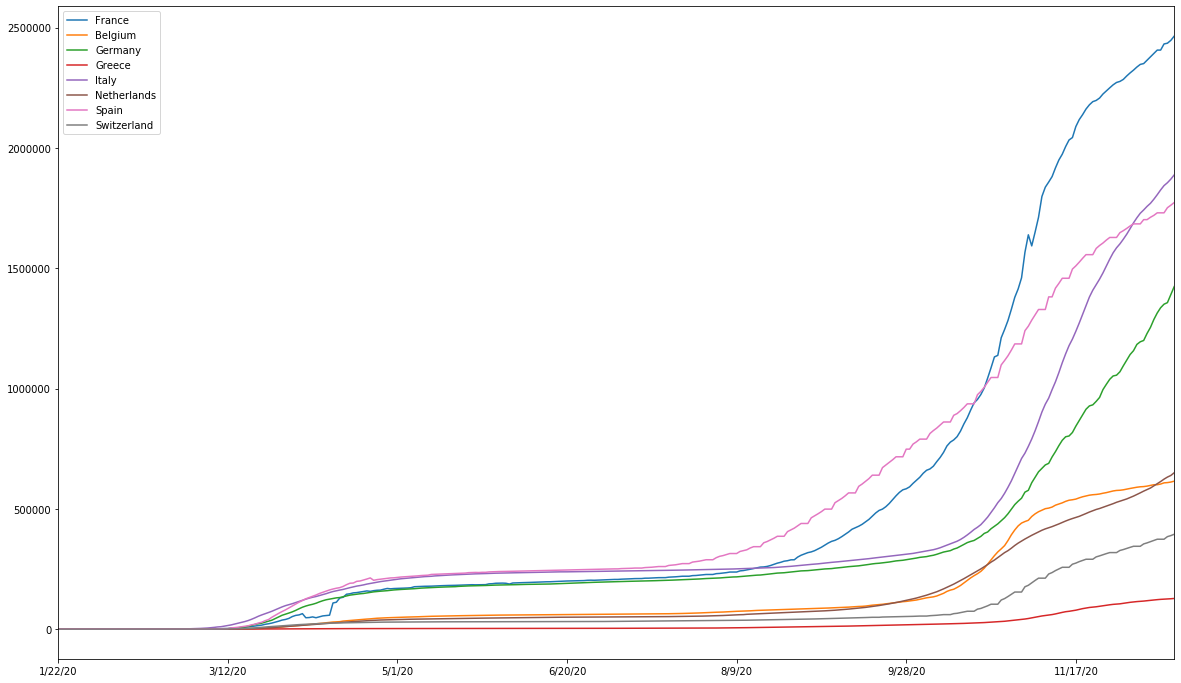

In [19]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Greece"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Netherlands"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
confirmed_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/confirmed-europe.png")
plt.show()

### Visualizing Europe recoveries cases

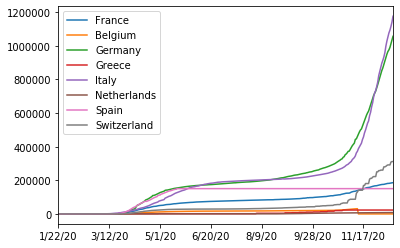

In [20]:
recoveries_df_aggregated.loc ["France"].plot()
recoveries_df_aggregated.loc ["Belgium"].plot()
recoveries_df_aggregated.loc ["Germany"].plot()
recoveries_df_aggregated.loc ["Greece"].plot()
recoveries_df_aggregated.loc ["Italy"].plot()
recoveries_df_aggregated.loc ["Netherlands"].plot()
recoveries_df_aggregated.loc ["Spain"].plot()
recoveries_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/recoveries-europe.png")
plt.show()

### Visualizing Europe deaths cases

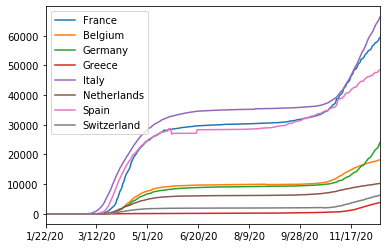

In [21]:
deaths_df_aggregated.loc ["France"].plot()
deaths_df_aggregated.loc ["Belgium"].plot()
deaths_df_aggregated.loc ["Germany"].plot()
deaths_df_aggregated.loc ["Greece"].plot()
deaths_df_aggregated.loc ["Italy"].plot()
deaths_df_aggregated.loc ["Netherlands"].plot()
deaths_df_aggregated.loc ["Spain"].plot()
deaths_df_aggregated.loc ["Switzerland"].plot()
plt.legend()
plt.savefig("img/deaths-europe.png")
plt.show()

### Visualizing Asia confirmed cases 

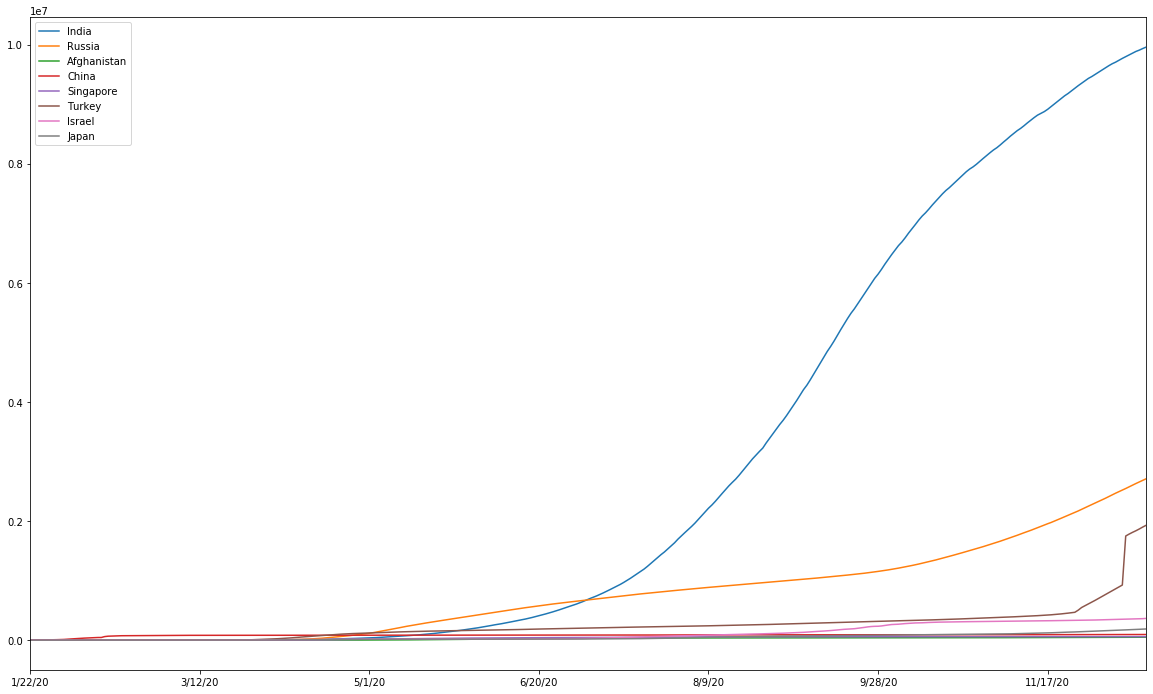

In [22]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["India"].plot()
confirmed_df_aggregated.loc ["Russia"].plot()
confirmed_df_aggregated.loc ["Afghanistan"].plot()
confirmed_df_aggregated.loc ["China"].plot()
confirmed_df_aggregated.loc ["Singapore"].plot()
confirmed_df_aggregated.loc ["Turkey"].plot()
confirmed_df_aggregated.loc ["Israel"].plot()
confirmed_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/confirmed-asia.png')
plt.show()

### Visualizing Asia recoveries cases

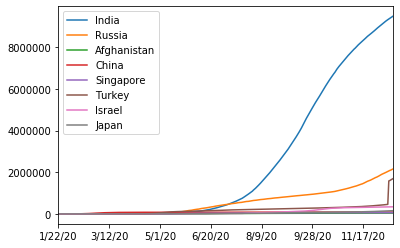

In [23]:
recoveries_df_aggregated.loc ["India"].plot()
recoveries_df_aggregated.loc ["Russia"].plot()
recoveries_df_aggregated.loc ["Afghanistan"].plot()
recoveries_df_aggregated.loc ["China"].plot()
recoveries_df_aggregated.loc ["Singapore"].plot()
recoveries_df_aggregated.loc ["Turkey"].plot()
recoveries_df_aggregated.loc ["Israel"].plot()
recoveries_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/recoveries-asia.png')
plt.show()

### Visualizing Asia deaths cases

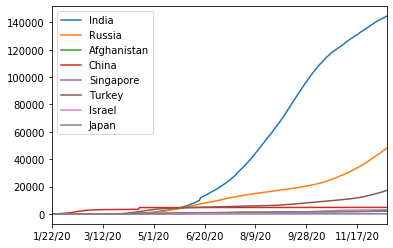

In [24]:
deaths_df_aggregated.loc ["India"].plot()
deaths_df_aggregated.loc ["Russia"].plot()
deaths_df_aggregated.loc ["Afghanistan"].plot()
deaths_df_aggregated.loc ["China"].plot()
deaths_df_aggregated.loc ["Singapore"].plot()
deaths_df_aggregated.loc ["Turkey"].plot()
deaths_df_aggregated.loc ["Israel"].plot()
deaths_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/deaths-asia.png')
plt.show()

### Visualizing Africa confirmed cases

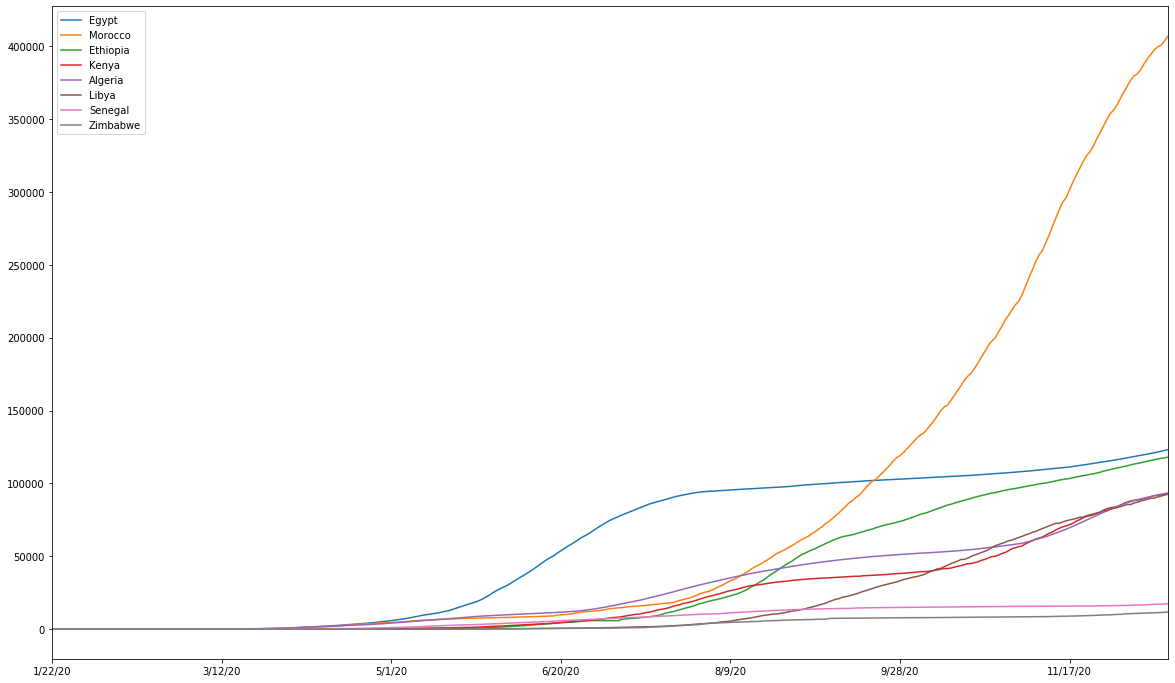

In [25]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Egypt"].plot()
confirmed_df_aggregated.loc ["Morocco"].plot()
confirmed_df_aggregated.loc ["Ethiopia"].plot()
confirmed_df_aggregated.loc ["Kenya"].plot()
confirmed_df_aggregated.loc ["Algeria"].plot()
confirmed_df_aggregated.loc ["Libya"].plot()
confirmed_df_aggregated.loc ["Senegal"].plot()
confirmed_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/confirmed-africa.png')
plt.show()

### Visualizing  Africa recoveries cases

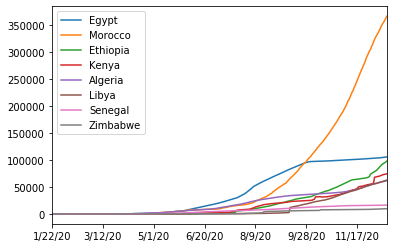

In [26]:
recoveries_df_aggregated.loc ["Egypt"].plot()
recoveries_df_aggregated.loc ["Morocco"].plot()
recoveries_df_aggregated.loc ["Ethiopia"].plot()
recoveries_df_aggregated.loc ["Kenya"].plot()
recoveries_df_aggregated.loc ["Algeria"].plot()
recoveries_df_aggregated.loc ["Libya"].plot()
recoveries_df_aggregated.loc ["Senegal"].plot()
recoveries_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/recoveries-africa.png')
plt.show()

### Visualizing Africa deaths cases

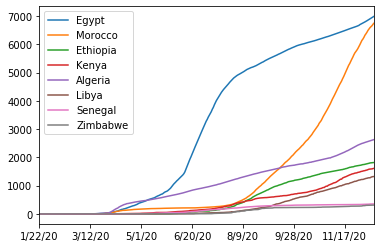

In [27]:
deaths_df_aggregated.loc ["Egypt"].plot()
deaths_df_aggregated.loc ["Morocco"].plot()
deaths_df_aggregated.loc ["Ethiopia"].plot()
deaths_df_aggregated.loc ["Kenya"].plot()
deaths_df_aggregated.loc ["Algeria"].plot()
deaths_df_aggregated.loc ["Libya"].plot()
deaths_df_aggregated.loc ["Senegal"].plot()
deaths_df_aggregated.loc ["Zimbabwe"].plot()
plt.legend()
plt.savefig('img/deaths-africa.png')
plt.show()

### Visualizing North America confirmed cases

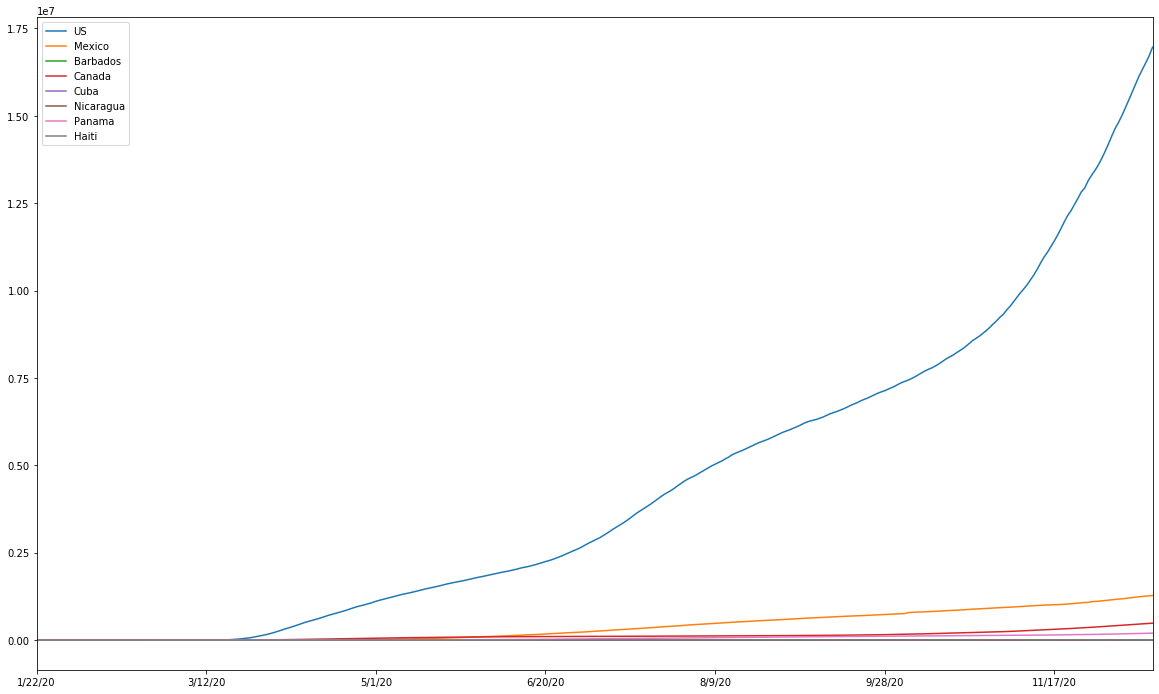

In [28]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["US"].plot()
confirmed_df_aggregated.loc ["Mexico"].plot()
confirmed_df_aggregated.loc ["Barbados"].plot()
confirmed_df_aggregated.loc ["Canada"].plot()
confirmed_df_aggregated.loc ["Cuba"].plot()
confirmed_df_aggregated.loc ["Nicaragua"].plot()
confirmed_df_aggregated.loc ["Panama"].plot()
confirmed_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/confirmed-northamerica.png')
plt.show()

### Visualizing North America recoveries cases

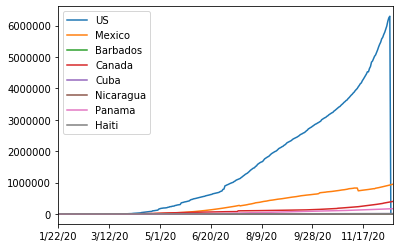

In [29]:
recoveries_df_aggregated.loc ["US"].plot()
recoveries_df_aggregated.loc ["Mexico"].plot()
recoveries_df_aggregated.loc ["Barbados"].plot()
recoveries_df_aggregated.loc ["Canada"].plot()
recoveries_df_aggregated.loc ["Cuba"].plot()
recoveries_df_aggregated.loc ["Nicaragua"].plot()
recoveries_df_aggregated.loc ["Panama"].plot()
recoveries_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/recoveries-northamerica.png')
plt.show()

### Visualizing North America deaths cases

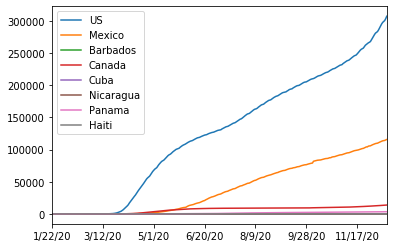

In [30]:
deaths_df_aggregated.loc ["US"].plot()
deaths_df_aggregated.loc ["Mexico"].plot()
deaths_df_aggregated.loc ["Barbados"].plot()
deaths_df_aggregated.loc ["Canada"].plot()
deaths_df_aggregated.loc ["Cuba"].plot()
deaths_df_aggregated.loc ["Nicaragua"].plot()
deaths_df_aggregated.loc ["Panama"].plot()
deaths_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/deaths-northamerica.png')
plt.show()

### Visualizing South America confirmed cases

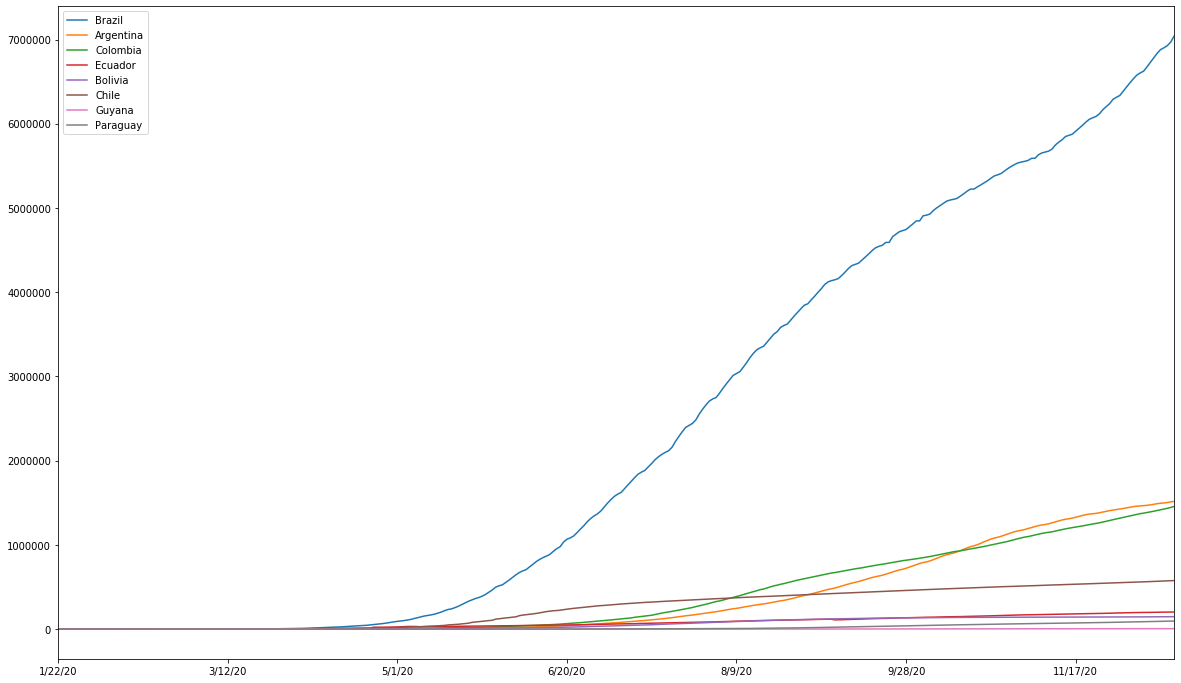

In [31]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Brazil"].plot()
confirmed_df_aggregated.loc ["Argentina"].plot()
confirmed_df_aggregated.loc ["Colombia"].plot()
confirmed_df_aggregated.loc ["Ecuador"].plot()
confirmed_df_aggregated.loc ["Bolivia"].plot()
confirmed_df_aggregated.loc ["Chile"].plot()
confirmed_df_aggregated.loc ["Guyana"].plot()
confirmed_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/confirmed-southamerica.png')
plt.show()

### Visualizing South America recoveries cases

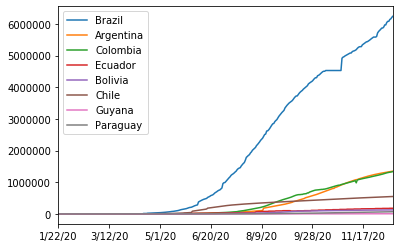

In [32]:
recoveries_df_aggregated.loc ["Brazil"].plot()
recoveries_df_aggregated.loc ["Argentina"].plot()
recoveries_df_aggregated.loc ["Colombia"].plot()
recoveries_df_aggregated.loc ["Ecuador"].plot()
recoveries_df_aggregated.loc ["Bolivia"].plot()
recoveries_df_aggregated.loc ["Chile"].plot()
recoveries_df_aggregated.loc ["Guyana"].plot()
recoveries_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/recoveries-southamerica.png')
plt.show()

### Visualizing South America deaths cases

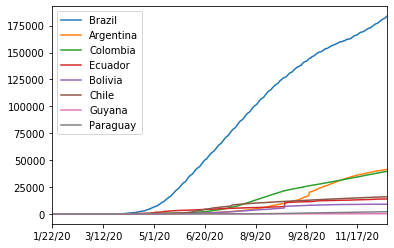

In [33]:
deaths_df_aggregated.loc ["Brazil"].plot()
deaths_df_aggregated.loc ["Argentina"].plot()
deaths_df_aggregated.loc ["Colombia"].plot()
deaths_df_aggregated.loc ["Ecuador"].plot()
deaths_df_aggregated.loc ["Bolivia"].plot()
deaths_df_aggregated.loc ["Chile"].plot()
deaths_df_aggregated.loc ["Guyana"].plot()
deaths_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/deaths-southamerica.png')
plt.show()

### Visualizing Oceania confirmed cases

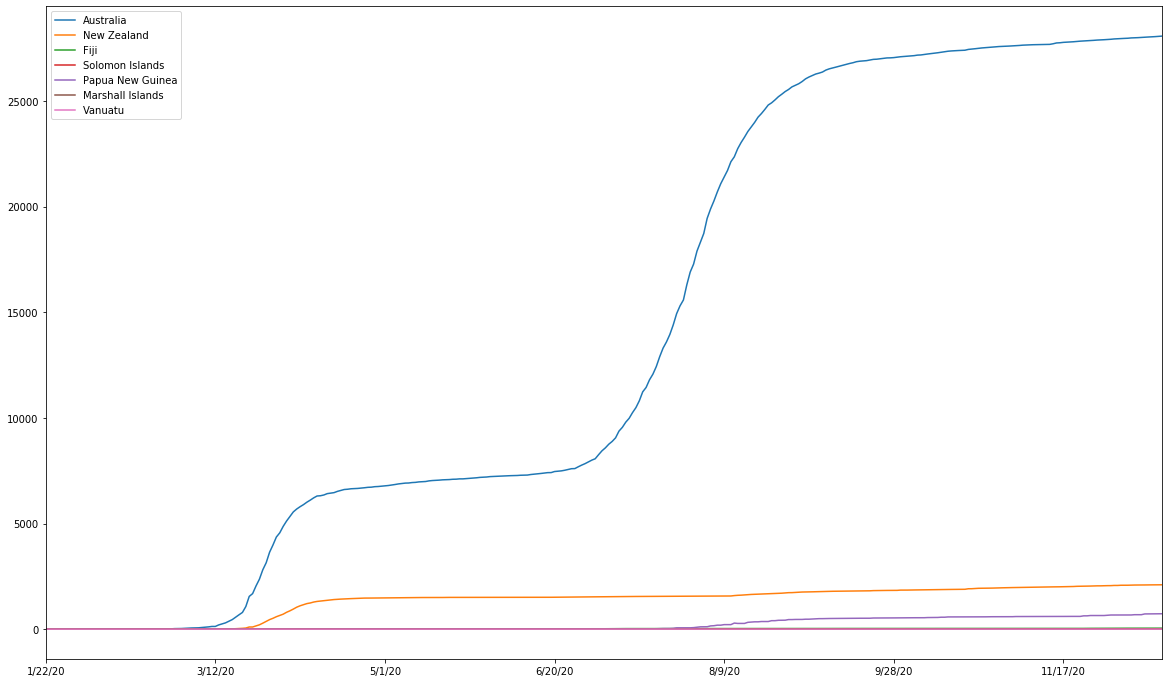

In [34]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Australia"].plot()
confirmed_df_aggregated.loc ["New Zealand"].plot()
confirmed_df_aggregated.loc ["Fiji"].plot()
confirmed_df_aggregated.loc ["Solomon Islands"].plot()
confirmed_df_aggregated.loc ["Papua New Guinea"].plot()
confirmed_df_aggregated.loc ["Marshall Islands"].plot()
confirmed_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/confirmed-oceania.png')
plt.show()

### Visualizing Oceania recoveries cases

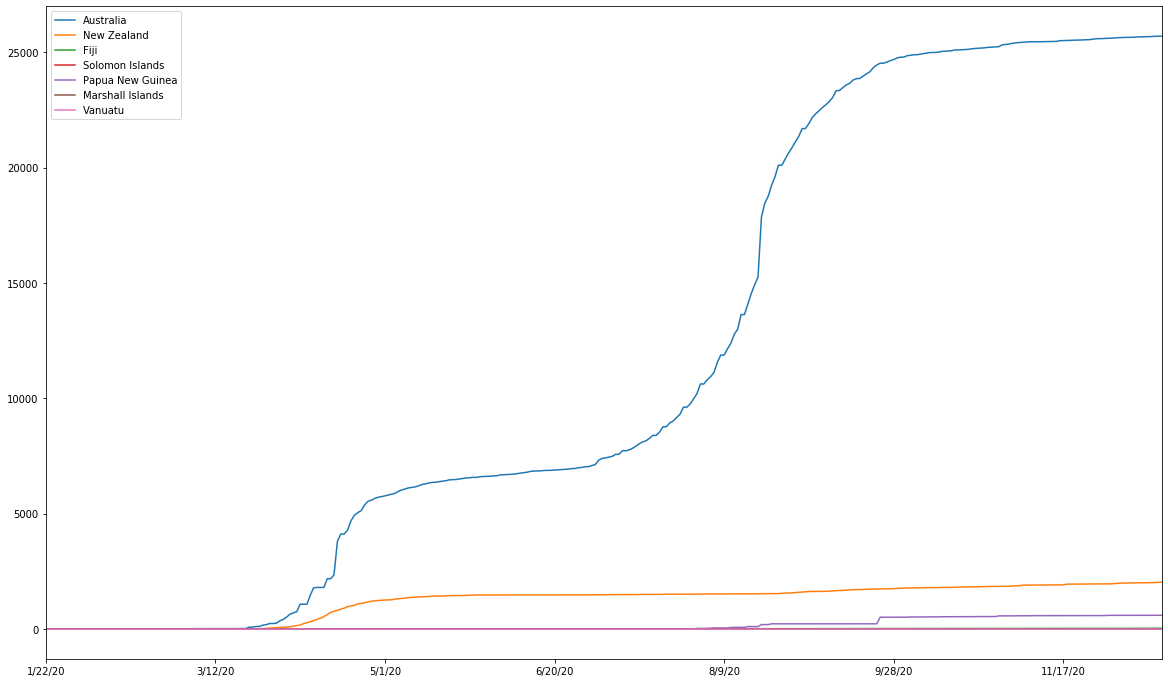

In [35]:
plt.figure(figsize=(20, 12))
recoveries_df_aggregated.loc ["Australia"].plot()
recoveries_df_aggregated.loc ["New Zealand"].plot()
recoveries_df_aggregated.loc ["Fiji"].plot()
recoveries_df_aggregated.loc ["Solomon Islands"].plot()
recoveries_df_aggregated.loc ["Papua New Guinea"].plot()
recoveries_df_aggregated.loc ["Marshall Islands"].plot()
recoveries_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/recoveries-oceania.png')
plt.show()

### Visualizing Oceania deaths cases

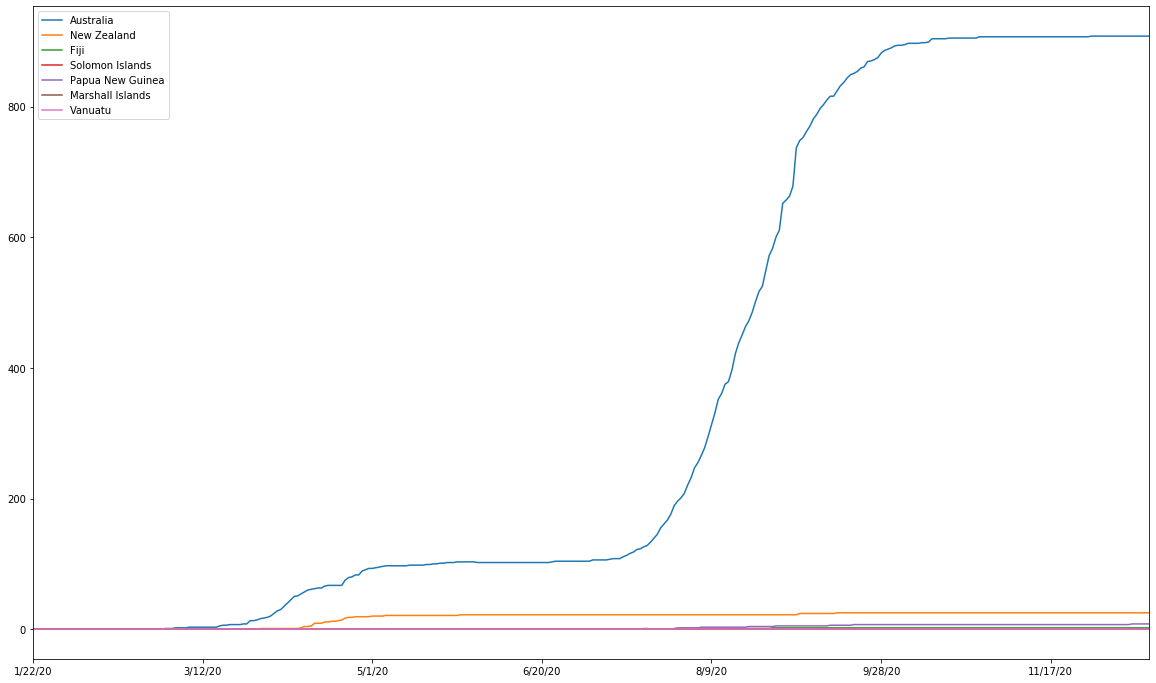

In [36]:
plt.figure(figsize=(20, 12))
deaths_df_aggregated.loc ["Australia"].plot()
deaths_df_aggregated.loc ["New Zealand"].plot()
deaths_df_aggregated.loc ["Fiji"].plot()
deaths_df_aggregated.loc ["Solomon Islands"].plot()
deaths_df_aggregated.loc ["Papua New Guinea"].plot()
deaths_df_aggregated.loc ["Marshall Islands"].plot()
deaths_df_aggregated.loc ["Vanuatu"].plot()
plt.legend()
plt.savefig('img/deaths-oceania.png')
plt.show()

### Calculating a good measure describing the spread of the virus 

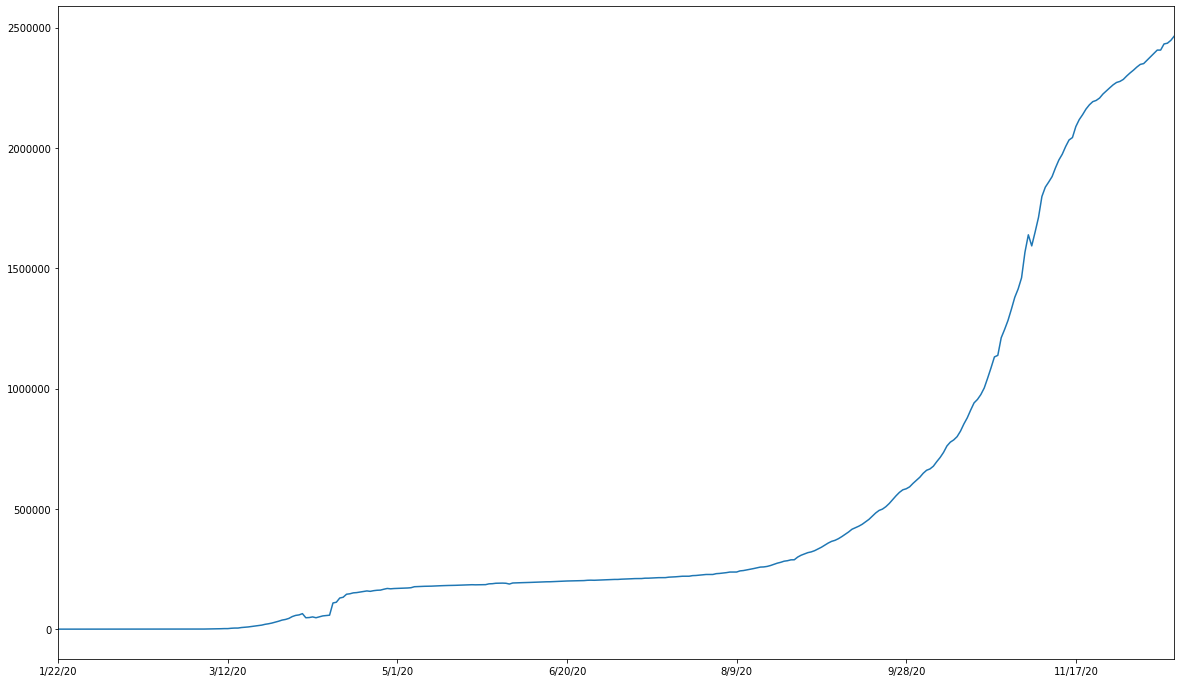

In [37]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['France'].plot()

### Calculating the first derivative of the curve

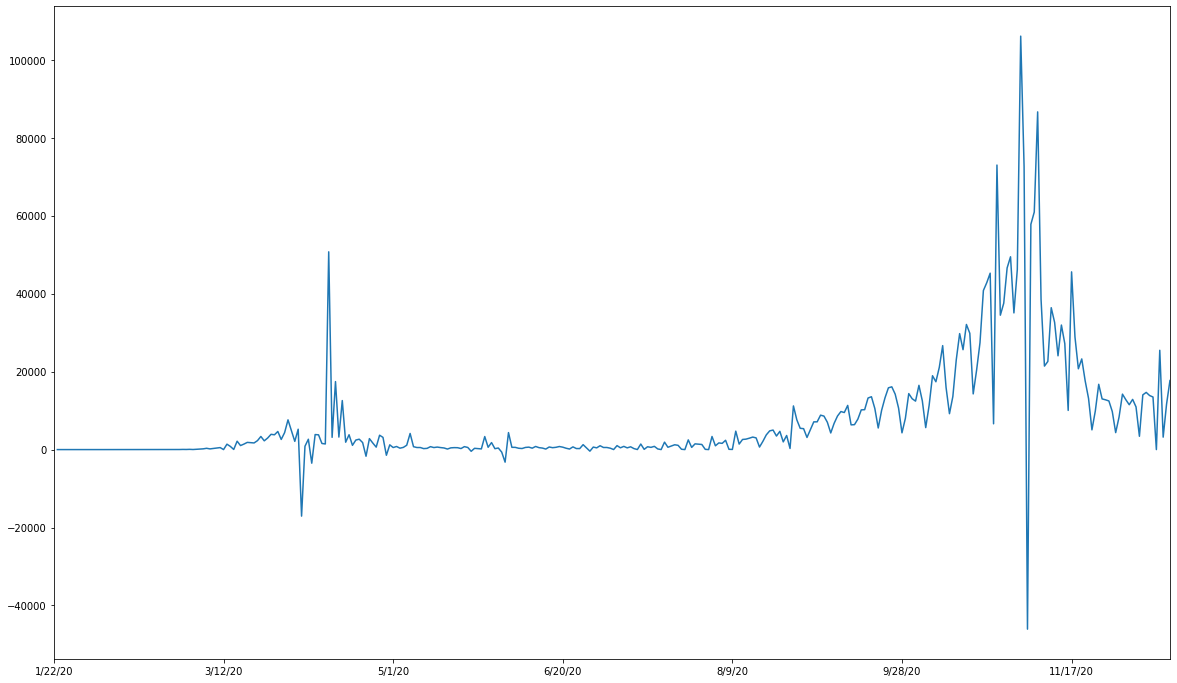

In [38]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['France'].diff().plot()

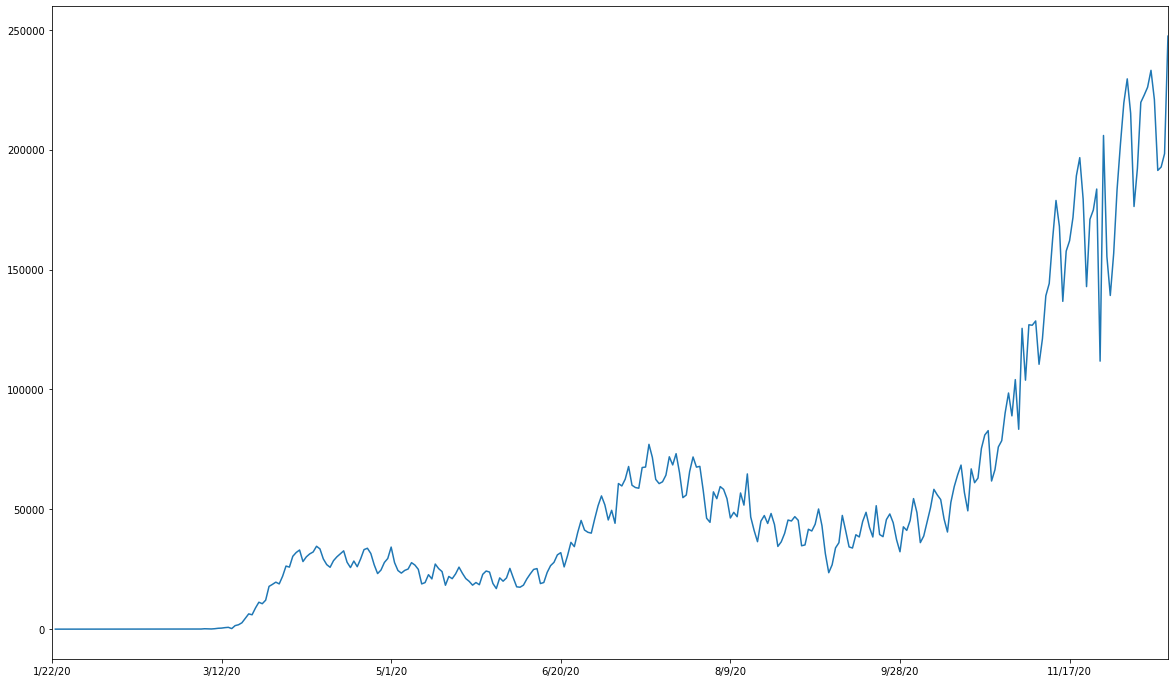

In [39]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['US'].diff().plot()

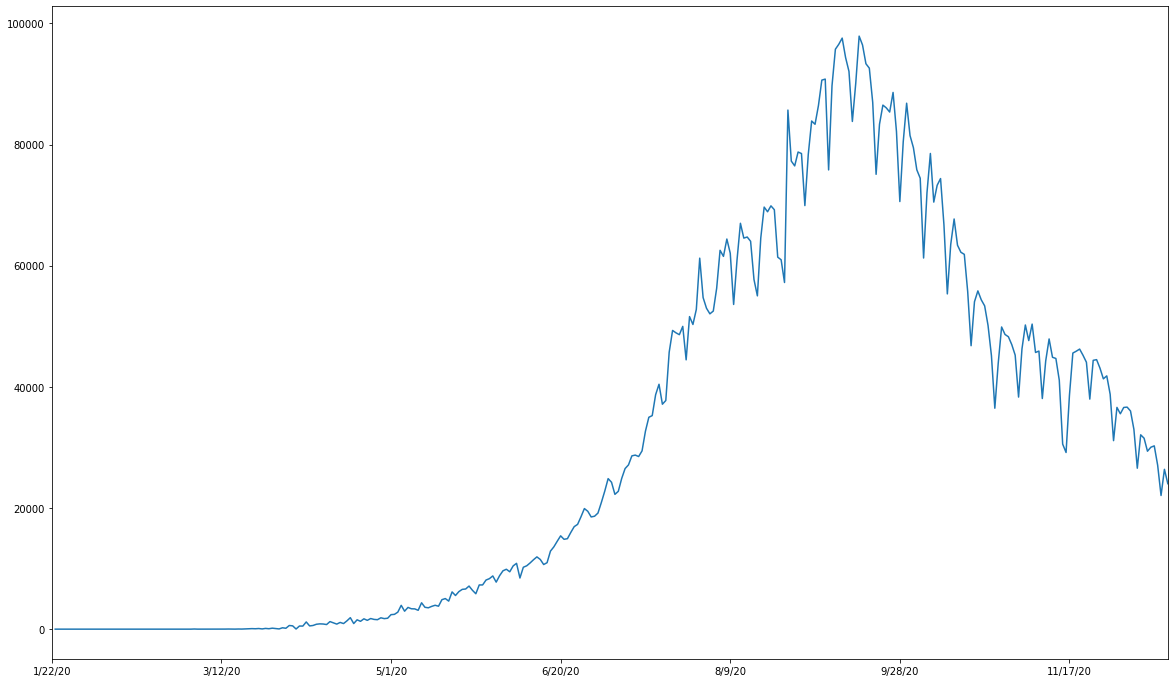

In [40]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc['India'].diff().plot()

### Find maximum infection rate for France

In [41]:
confirmed_df_aggregated.loc['France'].diff().max()

106091.0

### Find maximum infection rate for all countries. 

In [42]:
countries = list(confirmed_df_aggregated.index)
max_infection_rates = []
for c in countries : 
    max_infection_rates.append(confirmed_df_aggregated.loc[c].diff().max())
confirmed_df_aggregated["max_infection_rate"] = max_infection_rates

In [43]:
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47716,47851,48053,48116,48229,48527,48718,48952,49161,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,44436,45188,46061,46863,47742,48530,49191,50000,50637,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,89416,90014,90579,91121,91638,92102,92597,93065,93507,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7127,7162,7190,7236,7288,7338,7382,7382,7446,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,15729,15804,15925,16061,16161,16188,16277,16362,16407,355.0


### Create a new dataframe with maximum infection rate

In [44]:
confirmed_data=pd.DataFrame(confirmed_df_aggregated["max_infection_rate"])

In [45]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=False).head()
max_infection

,max_infection_rate
Country/Region,
Turkey,823225.0
US,247403.0
France,106091.0
India,97894.0
Brazil,70574.0


In [46]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=True).tail(20)

In [47]:
fig = px.bar(max_infection, x='max_infection_rate',y=max_infection.index,title='Countries with maximum infection rate', color='max_infection_rate', orientation='h')
fig.write_image("img/Countries-infection-rate.png", width=1960, height=1080)
fig.show()